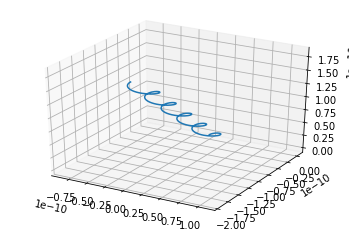

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x_ini=np.array([0,0,0])
v_ini=np.array([1,1,1])

E_field=np.array([1,0,0])
E_mag=np.linalg.norm(E_field)
e_vec=E_field/E_mag

B_field=np.array([0,0,1])
B_mag=np.linalg.norm(B_field)
b_vec=B_field/B_mag

charge_to_mass=1.6e12/9.31
omega=charge_to_mass*B_mag

tau_fin=5*2*np.pi
dtau=0.1
tau_steps=int(tau_fin/dtau)
dtau=tau_fin/tau_steps

a_vec=b_vec*dtau/2

vs=np.zeros(shape=(tau_steps+1,3))
xs=np.zeros(shape=(tau_steps+1,3))

vs[0,:]=v_ini
xs[0,:]=x_ini

for i in range(tau_steps):
    c_vec=vs[i,:]+dtau*(E_mag*e_vec/B_mag+np.cross(vs[i,:],b_vec)/2)
    vs[i+1,:]=(c_vec+np.dot(c_vec,a_vec)*a_vec-np.cross(a_vec,c_vec))/(1+np.dot(a_vec,a_vec))
    xs[i+1,:]=xs[i,:]+vs[i+1,:]*dtau/omega

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot(xs[:,0],xs[:,1],xs[:,2])

x_min=np.min(xs[:,0])
x_max=np.max(xs[:,0])
y_min=np.min(xs[:,1])
y_max=np.max(xs[:,1])
z_min=np.min(xs[:,2])
z_max=np.max(xs[:,2])

#minimum=np.min([x_min,y_min,z_min])
#maximum=np.max([x_max,y_max,z_max])
interval=np.max([x_max-x_min,y_max-y_min,z_max-z_min])

ax.auto_scale_xyz([(x_min+x_max-interval)/2,(x_min+x_max+interval)/2],
                   [(y_min+y_max-interval)/2,(y_min+y_max+interval)/2],
                   [(z_min+z_max-interval)/2,(z_min+z_max+interval)/2])